In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import f_classif , chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix for KNeighborsClassifier Model


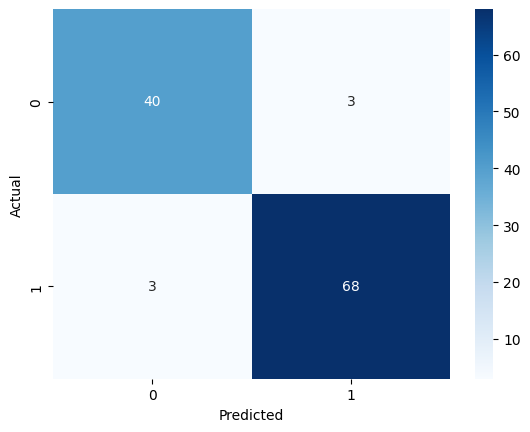

0.9473684210526315


In [4]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print("KNeighborsClassifier Model")
print(metrics.classification_report(y_test, y_pred_knn))
print("Confusion Matrix for KNeighborsClassifier Model")
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(metrics.accuracy_score(y_test,y_pred_knn))

In [5]:
def drop_redundant_features(X,threshold=0.9 , method='pearson'):
    corr_matrix = X.corr(method=method)
    redundant_pairs = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):    # loop only through lower triangle
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                redundant_pairs.add((colname1, colname2))
    print(f"Redundant feature pairs (threshold={threshold}): {redundant_pairs}")
    features_to_drop = set()
    for pair in redundant_pairs:
        features_to_drop.add(pair[0])
    X_reduced = X.drop(columns=features_to_drop)
    return X_reduced, features_to_drop

X_reduced, dropped_features = drop_redundant_features(X, threshold=0.9, method='pearson')
print(f"Dropped features using function: {dropped_features}")

Redundant feature pairs (threshold=0.9): {('worst texture', 'mean texture'), ('worst perimeter', 'mean perimeter'), ('worst radius', 'mean radius'), ('worst area', 'mean area'), ('worst area', 'worst perimeter'), ('worst area', 'worst radius'), ('worst area', 'mean perimeter'), ('worst perimeter', 'mean radius'), ('worst concave points', 'mean concave points'), ('mean area', 'mean perimeter'), ('mean perimeter', 'mean radius'), ('mean concave points', 'mean concavity'), ('area error', 'perimeter error'), ('worst radius', 'mean area'), ('worst area', 'mean radius'), ('worst radius', 'mean perimeter'), ('perimeter error', 'radius error'), ('mean area', 'mean radius'), ('area error', 'radius error'), ('worst perimeter', 'mean area'), ('worst perimeter', 'worst radius')}
Dropped features using function: {'mean concave points', 'worst concave points', 'worst area', 'mean perimeter', 'worst radius', 'perimeter error', 'mean area', 'area error', 'worst perimeter', 'worst texture'}


In [6]:
def anova_score_drop(X, y, threshold):
    anova_scores, _ = f_classif(X, y)
    selected_scores = anova_scores >= threshold
    X_anova = X.loc[:, selected_scores].copy()  # Added .copy() to avoid SettingWithCopyWarning
    return X_anova
X_reduced_anova = anova_score_drop(X_reduced, y, threshold=1)
X_reduced_anova.head()

C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,radius error,smoothness error,compactness error,concavity error,concave points error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,1.0950,0.006399,0.04904,0.05373,0.01587,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.5435,0.005225,0.01308,0.01860,0.01340,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.7456,0.006150,0.04006,0.03832,0.02058,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.4956,0.009110,0.07458,0.05661,0.01867,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.7572,0.011490,0.02461,0.05688,0.01885,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [7]:
X_reduced_anova['tumer_size'] = pd.cut(X_reduced_anova['mean radius'], bins=[0,12,18,np.inf], labels=['small','medium','large'])
le = LabelEncoder()
X_reduced_anova['tumer_size'] = le.fit_transform(X_reduced_anova['tumer_size'])
X_reduced_anova.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,radius error,smoothness error,compactness error,concavity error,concave points error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,tumer_size
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,1.0950,0.006399,0.04904,0.05373,0.01587,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.5435,0.005225,0.01308,0.01860,0.01340,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.7456,0.006150,0.04006,0.03832,0.02058,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.4956,0.009110,0.07458,0.05661,0.01867,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,2
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.7572,0.011490,0.02461,0.05688,0.01885,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,0


KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix for KNeighborsClassifier Model


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


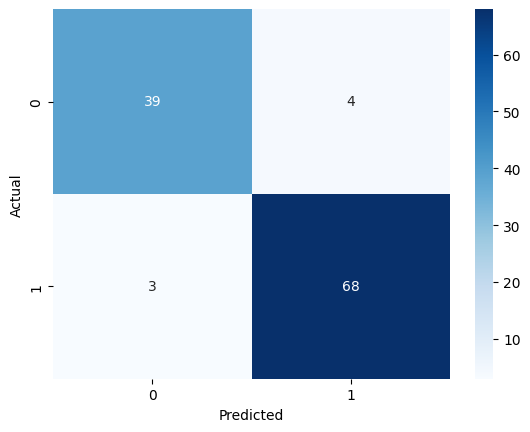

0.9385964912280702


In [8]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_reduced_anova, y, test_size=0.2, random_state=42)
scaler_2 = StandardScaler()
X_train_2 = scaler_2.fit_transform(X_train_2)
X_test_2 = scaler_2.transform(X_test_2)

knn_classifier_2 = KNeighborsClassifier()
knn_classifier_2.fit(X_train_2, y_train_2)
y_pred_knn_2 = knn_classifier_2.predict(X_test_2)
print("KNeighborsClassifier Model")
print(metrics.classification_report(y_test_2, y_pred_knn_2))
print("Confusion Matrix for KNeighborsClassifier Model")
cm_knn_2 = metrics.confusion_matrix(y_test_2, y_pred_knn_2)
sns.heatmap(cm_knn_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(metrics.accuracy_score(y_test_2,y_pred_knn_2))

Random Forest Classifier Report


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



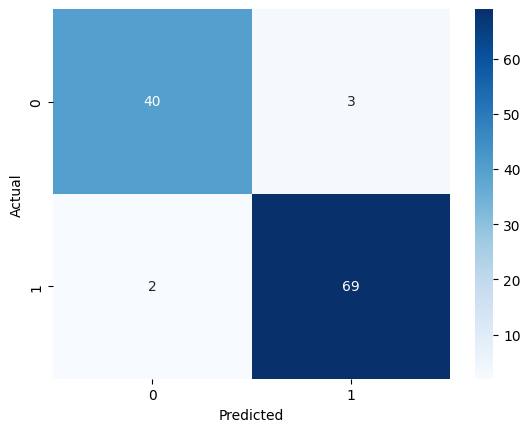

0.956140350877193


In [9]:
rf_clf = RandomForestClassifier(n_estimators=10 , random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Random Forest Classifier Report")
print(metrics.classification_report(y_test, y_pred))
cm_rf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(metrics.accuracy_score(y_test,y_pred))

Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


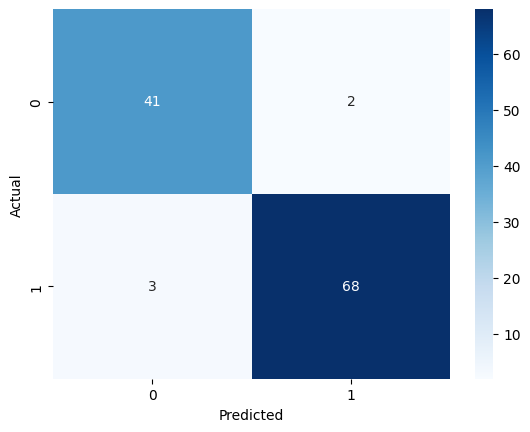

0.956140350877193


In [10]:
rf_clf = RandomForestClassifier(n_estimators=10 , random_state=42)
rf_clf.fit(X_train_2, y_train_2)
y_pred_2 = rf_clf.predict(X_test_2)
print("Random Forest Classifier Report")
print(metrics.classification_report(y_test_2, y_pred_2))
cm_rf = metrics.confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(metrics.accuracy_score(y_test_2,y_pred_2))